In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import os
import pandas as pd
import numpy as np
import sys
from tqdm import tqdm
import h5py
sys.path.append('/home/jma819/post_cmfe_analysis')
#sys.path.append('/Users/johnmarshall/Documents/Analysis/PythonAnalysisScripts/post_cmfe_analysis')
from matplotlib import pyplot as plt
import dlc_utils

In [3]:
from importlib import reload
reload(dlc_utils)

<module 'dlc_utils' from '/home/jma819/post_cmfe_analysis/dlc_utils.py'>

In [4]:
#dlc_directory = '/volumes/My_Passport/dlc_analysis/behavcamvideos/open_field_miniscope/'
dlc_directory = '/projects/b1118/behaviorvideos/'

In [5]:
experiment_folders = [folder for folder in os.listdir(dlc_directory) if '_H' in folder]

In [6]:
experiment_folders

['GRIN013_H13_M33_S54']

In [7]:
for folder in tqdm(experiment_folders):
    output_directory = dlc_directory+folder+'/'
    session_name = folder
    print(folder)
    dlc_output_files = os.listdir(output_directory)
    dlc_output_files.sort()
    
    names = []
    dlc_dfs = []
    

100%|██████████| 1/1 [00:00<00:00, 679.90it/s]

GRIN013_H13_M33_S54


In [8]:
dlc_output_files

['GRIN013_H13_M33_S54_compiled_session_02112021.csv',
 'GRIN013_H13_M33_S54_compiled_session_02112021.h5',
 'GRIN013_H13_M33_S54_dlc_tracking_foranalysis_02112021.csv',
 'behavCam01.avi',
 'behavCam01DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5',
 'behavCam01DLC_resnet50_Open_Field_v2Jan27shuffle1_150000_labeled.mp4',
 'behavCam01DLC_resnet50_Open_Field_v2Jan27shuffle1_150000includingmetadata.pickle',
 'behavCam02.avi',
 'behavCam02DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5',
 'behavCam02DLC_resnet50_Open_Field_v2Jan27shuffle1_150000_labeled.mp4',
 'behavCam02DLC_resnet50_Open_Field_v2Jan27shuffle1_150000includingmetadata.pickle',
 'behavCam03.avi',
 'behavCam03DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5',
 'behavCam03DLC_resnet50_Open_Field_v2Jan27shuffle1_150000_labeled.mp4',
 'behavCam03DLC_resnet50_Open_Field_v2Jan27shuffle1_150000includingmetadata.pickle',
 'behavCam04.avi',
 'behavCam04DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5',
 'behavCam04DLC_resnet50_

In [104]:
dlc_output = pd.read_hdf('/projects/b1118/behaviorvideos/GRIN013_H13_M33_S54/behavCam02DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5')
#dlc_output = dlc_utils.calculate_centroid(dlc_output)
#should also append a time column for alignment to avi file
time_within_movie_seconds = np.linspace(0, 50, 1000)

In [105]:
dlc_output.head()

scorer    DLC_resnet50_Open_Field_v2Jan27shuffle1_150000              \
bodyparts                                       ear_left               
coords                                                 x           y   
0                                             292.508667  357.506012   
1                                             292.862366  357.351593   
2                                             293.086090  357.166443   
3                                             292.763947  357.294891   
4                                             293.038818  357.544952   

scorer                                                               \
bodyparts              ear_right                          tail_base   
coords    likelihood           x           y likelihood           x   
0           0.074033  300.513000  364.337311   0.180357  253.353836   
1           0.093176  302.479034  370.733826   0.303444  253.549255   
2           0.185885  302.335846  370.647156   0.392228  253.383041   
3           0.114862  301.174866  364.848114   0.248863  253.609161   
4           0.089646  302.475433  370.651306   0.233052  253.424500   

scorer                                                                   
bodyparts                        miniscope_light                         
coords              y likelihood               x           y likelihood  
0          375.582794        1.0      307.633392  355.723877   0.008590  
1          375.880615        1.0      307.503723  355.476562   0.008776  
2          375.891968        1.0      307.716858  355.432251   0.015284  
3          375.824310        1.0      307.500061  355.350494   0.008182  
4          375.775513        1.0      307.749084  355.445374   0.010289

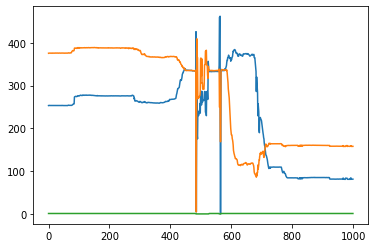

In [11]:
label = 'tail_base'
plt.plot(dlc_output['DLC_resnet50_Open_Field_v2Jan27shuffle1_150000'][label]['x'])
plt.plot(dlc_output['DLC_resnet50_Open_Field_v2Jan27shuffle1_150000'][label]['y'])
plt.plot(dlc_output['DLC_resnet50_Open_Field_v2Jan27shuffle1_150000'][label]['likelihood'])

In [12]:
## find regions where likelihood is less than maybe .9-1
low_likelihood_indicies = dlc_output.loc[dlc_output['DLC_resnet50_Open_Field_v2Jan27shuffle1_150000'][label]['likelihood']<0.9].index
#if want to get time 
#low_likelihood_times = time_within_movie_seconds[list(low_likelihood_indicies)]
#remove coordinate values from low likelihood regions 
dlc_output.loc[low_likelihood_indicies, ('DLC_resnet50_Open_Field_v2Jan27shuffle1_150000', 'tail_base', 'x')]=np.nan
dlc_output.loc[low_likelihood_indicies, ('DLC_resnet50_Open_Field_v2Jan27shuffle1_150000', 'tail_base', 'y')]=np.nan

In [13]:
#dlc_output.loc[low_likelihood_indicies]

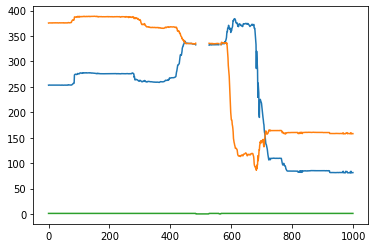

In [14]:
label = 'tail_base'
plt.plot(dlc_output['DLC_resnet50_Open_Field_v2Jan27shuffle1_150000'][label]['x'])
plt.plot(dlc_output['DLC_resnet50_Open_Field_v2Jan27shuffle1_150000'][label]['y'])
plt.plot(dlc_output['DLC_resnet50_Open_Field_v2Jan27shuffle1_150000'][label]['likelihood'])

In [15]:
coordinates_delta_df = dlc_utils.difference_df(dlc_output)

In [16]:
coordinates_delta_df.head()

miniscope_light           tail_base           ear_right            \
coords               x         y         x         y         x         y   
0                  NaN       NaN       NaN       NaN       NaN       NaN   
1            -0.129669 -0.247314  0.195419  0.297821  1.966034  6.396515   
2             0.213135 -0.044312 -0.166214  0.011353 -0.143188 -0.086670   
3            -0.216797 -0.081757  0.226120 -0.067657 -1.160980 -5.799042   
4             0.249023  0.094879 -0.184662 -0.048798  1.300568  5.803192   

        ear_left            
coords         x         y  
0            NaN       NaN  
1       0.353699 -0.154419  
2       0.223724 -0.185150  
3      -0.322144  0.128448  
4       0.274872  0.250061

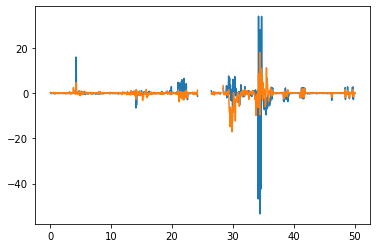

In [17]:
# much better but still need to remove instances of rapid switching here 
label = 'tail_base'
plt.plot(time_within_movie_seconds, coordinates_delta_df[label]['x'])
plt.plot(time_within_movie_seconds, coordinates_delta_df[label]['y'])


In [18]:
df_columns = list(dlc_output.columns)
velocity_df = pd.DataFrame(np.transpose(np.array([np.array([dlc_utils.velocity(coordinates_delta_df[body_part]['x'].values[frame],coordinates_delta_df[body_part]['y'].values[frame]) for frame in range(len(coordinates_delta_df))]) for body_part in list(set([df_columns[item][1] for item in range(len(df_columns))]))])), 
                                       columns=list(set([df_columns[item][1] for item in range(len(df_columns))]))) 
for body_part in list(set([df_columns[item][1] for item in range(len(df_columns))])):
    velocity_df[body_part+'_likelihood']=dlc_output[df_columns[0][0]][body_part]['likelihood'].values

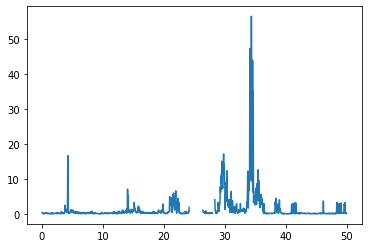

In [19]:
## for now this might be good enough to pick out regions for later review
label = 'tail_base'
plt.plot(time_within_movie_seconds, velocity_df[label])


In [20]:
# check if alignment to msCam videos is working 

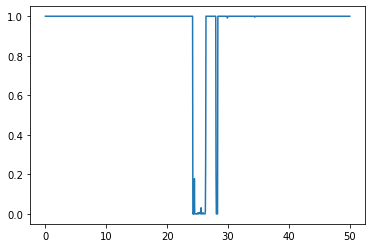

In [21]:
velocity_df
plt.plot(time_within_movie_seconds, velocity_df['tail_base_likelihood'])

In [22]:
## compiling all files in recording session to check msCam alignment
dlc_directory 

'/projects/b1118/behaviorvideos/'

In [23]:
session_name

'GRIN013_H13_M33_S54'

In [44]:
for folder in tqdm(experiment_folders):
    output_directory = dlc_directory+folder+'/'
    session_name = folder
    print(folder)
    dlc_output_files = os.listdir(output_directory)
    dlc_output_files.sort()


100%|██████████| 1/1 [00:00<00:00, 417.34it/s]

GRIN013_H13_M33_S54


In [47]:
#dlc_output_files[0:10]

In [108]:
list(set(dlc_output.columns.get_level_values(1)))

['miniscope_light', 'tail_base', 'ear_right', 'ear_left']

In [110]:
for folder in tqdm(experiment_folders):
    output_directory = dlc_directory+folder+'/'
    session_name = folder
    print(folder)
    dlc_output_files = os.listdir(output_directory)
    dlc_output_files.sort()    
    names = []
    dlc_dfs = []
    for output_file in dlc_output_files[0:10]:
        if output_file.endswith('000.h5'):
            print(output_file)
            dlc_output = pd.read_hdf(output_directory + output_file)
            
            ## before calculating centroid remove regions where 
            # find regions where likelihood is less than maybe .9-1
            for body_part in list(set(dlc_output.columns.get_level_values(1))):
                low_likelihood_indicies = dlc_output.loc[dlc_output['DLC_resnet50_Open_Field_v2Jan27shuffle1_150000'][body_part]['likelihood']<0.9].index
                #remove coordinate values from low likelihood regions 
                dlc_output.loc[low_likelihood_indicies, ('DLC_resnet50_Open_Field_v2Jan27shuffle1_150000', body_part, 'x')]=np.nan
                dlc_output.loc[low_likelihood_indicies, ('DLC_resnet50_Open_Field_v2Jan27shuffle1_150000', body_part, 'y')]=np.nan
          
            dlc_output = dlc_utils.calculate_centroid(dlc_output)
            dlc_output.head()
            coordinates_delta_df = dlc_utils.difference_df(dlc_output)
            df_columns = list(dlc_output.columns)

            print('calculating velocity')
            velocity_df = pd.DataFrame(np.transpose(np.array([np.array([dlc_utils.velocity(coordinates_delta_df[body_part]['x'].values[frame],coordinates_delta_df[body_part]['y'].values[frame]) for frame in range(len(coordinates_delta_df))]) for body_part in list(set([df_columns[item][1] for item in range(len(df_columns))]))])), 
                                       columns=list(set([df_columns[item][1] for item in range(len(df_columns))]))) 
            for body_part in list(set([df_columns[item][1] for item in range(len(df_columns))])):
                velocity_df[body_part+'_likelihood']=dlc_output[df_columns[0][0]][body_part]['likelihood'].values
            
            names.append(output_file)
            dlc_dfs.append(velocity_df)

    session_compiled = pd.concat(dlc_dfs, keys=names)

    #save compiled session 
    session_compiled.to_hdf(output_directory+session_name+'_compiled_session_02112021.h5', key='df')
    session_compiled.to_csv(output_directory+session_name+'_compiled_session_02112021.csv')

    #create behavior data aligned to the msCam frames
    #need to have switch here for msCam and BehavCam cam #s
    #in these recordings behavcam records at faster framerate (30fps vs 20fps) so will have more frames
    timsestamps_file = output_directory+'timestamp.dat'
    Cam0_timestamps = frame_clock_df[frame_clock_df['camNum'] == 0]  
    Cam1_timestamps = frame_clock_df[frame_clock_df['camNum'] == 1]
    if len(Cam1_timestamps)>len(Cam0_timestamps):
        msCam_camnum=0
        behavCam_camnum=1
    else if len(Cam1_timestamps)<len(Cam0_timestamps):
        msCam_camnum=1
        behavCam_camnum=0
    else:
        print('check timestamp file')
        break   

    # changing selection of frames from session compiled dataframe to account for 1 indexing of frames in timestamp file 
    aligned = dlc_utils.downsample_dlc_to_behavior(output_directory+session_name+'_compiled_session_02112021.h5', output_directory+'timestamp.dat', 
                                                   msCam_camnum, behavCam_camnum)
    aligned.reset_index(inplace=True)
    aligned['msCamFrame'] = aligned.index.values
    aligned = aligned.set_index(pd.to_timedelta(np.linspace(0, len(aligned)*(1/20), len(aligned)), unit='s'), drop=False)

    #smooth data by downsampling and interpolating 
    interpolated = dlc_utils.downsample_and_interpolate(aligned, '.05S', '1S', 'linear')
    interpolated.to_csv(output_directory+session_name+'_dlc_tracking_foranalysis_02112021.csv')

    output_directory+session_name+'_dlc_tracking_foranalysis.csv'


  0%|          | 0/1 [00:00<?, ?it/s]

GRIN013_H13_M33_S54
behavCam01DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5
calculating velocity
behavCam02DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5
calculating velocity




  0%|          | 0/35701 [00:00<?, ?it/s]

  0%|          | 35/35701 [00:00<01:42, 349.38it/s]

  0%|          | 70/35701 [00:00<01:42, 348.12it/s]

  0%|          | 114/35701 [00:00<01:36, 370.45it/s]

  0%|          | 163/35701 [00:00<01:29, 398.59it/s]

  1%|          | 201/35701 [00:00<01:30, 392.32it/s]

  1%|          | 240/35701 [00:00<01:30, 391.62it/s]

  1%|          | 276/35701 [00:00<01:33, 378.58it/s]

  1%|          | 314/35701 [00:00<01:34, 374.34it/s]

  1%|          | 350/35701 [00:00<01:40, 351.76it/s]

  1%|          | 388/35701 [00:01<01:39, 355.39it/s]

  1%|          | 427/35701 [00:01<01:37, 362.46it/s]

  1%|▏         | 463/35701 [00:01<01:38, 358.25it/s]

  1%|▏         | 499/35701 [00:01<01:40, 349.21it/s]

  2%|▏         | 543/35701 [00:01<01:35, 369.49it/s]

  2%|▏         | 581/35701 [00:01<01:42, 344.25it/s]

  2%|▏         | 623/35701 [00:01<01:36, 362.13it/s]

  2%|▏         | 661/35701 [00:01<01:35, 366.42it/s]

  2%|▏         | 699/35701 [00:01<01:39

In [111]:
frame_clock_df = pd.read_table(output_directory+'timestamp.dat')

In [112]:
frame_clock_df

,camNum,frameNum,sysClock,buffer
0,1,1,1,1
1,0,1,182663,1
2,1,2,33,1
3,1,3,66,1
4,0,2,49,1
...,...,...,...,...
89280,1,53582,1786096,1
89281,1,53583,1786129,1
89282,0,35700,1786115,1
89283,1,53584,1786160,1


In [113]:
msCam_timestamps = frame_clock_df[frame_clock_df['camNum'] == 0].set_index('frameNum')
behavCam_timestamps = frame_clock_df[frame_clock_df['camNum'] == 1].set_index('frameNum')

In [114]:
msCam_timestamps['sysClock'][1] = 0
behavCam_timestamps['sysClock'][1] = 0

In [115]:
msCam_timestamps.iloc[0:20]

,camNum,sysClock,buffer
frameNum,,,
1,0,0,1
2,0,49,1
3,0,102,1
4,0,155,1
5,0,208,1
6,0,256,1
7,0,303,1
8,0,351,1
9,0,405,1


In [116]:
behavCam_timestamps.iloc[0:20]

,camNum,sysClock,buffer
frameNum,,,
1,1,0,1
2,1,33,1
3,1,66,1
4,1,99,1
5,1,133,1
6,1,164,1
7,1,196,1
8,1,227,1
9,1,260,1


In [117]:
msCam_timestamps = dlc_utils.align_behavior_data(msCam_timestamps, behavCam_timestamps)
#msCam_timestamps.reset_index(inplace=True)


100%|██████████| 35701/35701 [02:31<00:00, 235.20it/s]


In [118]:
msCam_timestamps

,camNum,sysClock,buffer,behavCam_frames,sys_clock_behavCam
frameNum,,,,,
1,0,0,1,1,0
2,0,49,1,2,33
3,0,102,1,4,99
4,0,155,1,6,164
5,0,208,1,7,196
...,...,...,...,...,...
35697,0,1785964,1,53578,1785969
35698,0,1786014,1,53579,1786000
35699,0,1786064,1,53581,1786065


In [119]:
#this seems to shift everything by 1 frame 
msCam_timestamps.reset_index()

,frameNum,camNum,sysClock,buffer,behavCam_frames,sys_clock_behavCam
0,1,0,0,1,1,0
1,2,0,49,1,2,33
2,3,0,102,1,4,99
3,4,0,155,1,6,164
4,5,0,208,1,7,196
...,...,...,...,...,...,...
35696,35697,0,1785964,1,53578,1785969
35697,35698,0,1786014,1,53579,1786000
35698,35699,0,1786064,1,53581,1786065
35699,35700,0,1786115,1,53583,1786129


In [120]:
dlc_full = session_compiled.droplevel(0)
dlc_full = dlc_full.reset_index(drop=True)
dlc_full

,ear_right,miniscope_light,ear_left,centroid,tail_base,ear_right_likelihood,miniscope_light_likelihood,ear_left_likelihood,centroid_likelihood,tail_base_likelihood
0,NaN,NaN,NaN,NaN,NaN,0.543999,0.000948,0.860782,0.601432,1.0
1,NaN,NaN,NaN,NaN,0.020989,0.544328,0.000909,0.846108,0.597836,1.0
2,NaN,NaN,NaN,NaN,0.223639,0.568832,0.001060,0.892291,0.615546,1.0
3,NaN,NaN,NaN,NaN,0.125337,0.466004,0.000912,0.831427,0.574586,1.0
4,NaN,NaN,NaN,NaN,0.208928,0.496595,0.000906,0.860816,0.589579,1.0
...,...,...,...,...,...,...,...,...,...,...
1995,0.098040,NaN,0.111915,NaN,0.105672,0.998853,0.008966,0.959417,0.741809,1.0
1996,0.193856,NaN,0.189081,NaN,0.379031,0.997778,0.006949,0.941922,0.736662,1.0
1997,2.451435,NaN,NaN,NaN,0.188487,0.997728,0.008493,0.896508,0.725682,1.0
1998,2.342792,NaN,NaN,NaN,0.338385,0.998395,0.010634,0.956573,0.741400,1.0


In [144]:
msCam_timestamps.reset_index()

,frameNum,camNum,sysClock,buffer,behavCam_frames,sys_clock_behavCam
0,1,0,0,1,1,0
1,2,0,49,1,2,33
2,3,0,102,1,4,99
3,4,0,155,1,6,164
4,5,0,208,1,7,196
...,...,...,...,...,...,...
35696,35697,0,1785964,1,53578,1785969
35697,35698,0,1786014,1,53579,1786000
35698,35699,0,1786064,1,53581,1786065
35699,35700,0,1786115,1,53583,1786129


In [149]:
# the frames in the time stamp data frame are 1 indexed so need to subtract 1 
aligned = dlc_full.iloc[[row-1 for row in msCam_timestamps['behavCam_frames'].values if row<len(dlc_full)],:]
aligned.reset_index(inplace=True, drop=True)

In [157]:
msCam_timestamps.reset_index().loc[:len(aligned)-1]

,frameNum,camNum,sysClock,buffer,behavCam_frames,sys_clock_behavCam
0,1,0,0,1,1,0
1,2,0,49,1,2,33
2,3,0,102,1,4,99
3,4,0,155,1,6,164
4,5,0,208,1,7,196
...,...,...,...,...,...,...
1327,1328,0,66397,1,1993,66404
1328,1329,0,66448,1,1994,66436
1329,1330,0,66498,1,1996,66500
1330,1331,0,66548,1,1998,66563


In [158]:
#aligned

In [ ]:
msCam_timestamps.loc[msCam_timestamps['behavCam_frames']]

In [159]:
aligned_out = pd.concat([aligned, msCam_timestamps.reset_index().loc[:len(aligned)-1]], axis=1)

In [160]:
aligned_out

,ear_right,miniscope_light,ear_left,centroid,tail_base,ear_right_likelihood,miniscope_light_likelihood,ear_left_likelihood,centroid_likelihood,tail_base_likelihood,frameNum,camNum,sysClock,buffer,behavCam_frames,sys_clock_behavCam
0,NaN,NaN,NaN,NaN,NaN,0.543999,0.000948,0.860782,0.601432,1.0,1,0,0,1,1,0
1,NaN,NaN,NaN,NaN,0.020989,0.544328,0.000909,0.846108,0.597836,1.0,2,0,49,1,2,33
2,NaN,NaN,NaN,NaN,0.125337,0.466004,0.000912,0.831427,0.574586,1.0,3,0,102,1,4,99
3,NaN,NaN,NaN,NaN,0.164762,0.424931,0.000809,0.801311,0.556763,1.0,4,0,155,1,6,164
4,NaN,NaN,NaN,NaN,0.068490,0.554400,0.000895,0.866591,0.605472,1.0,5,0,208,1,7,196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1327,2.807609,NaN,NaN,NaN,2.534023,0.995579,0.004969,0.909479,0.727507,1.0,1328,0,66397,1,1993,66404
1328,0.123100,NaN,0.489495,NaN,3.132983,0.998664,0.008219,0.950537,0.739355,1.0,1329,0,66448,1,1994,66436
1329,0.098040,NaN,0.111915,NaN,0.105672,0.998853,0.008966,0.959417,0.741809,1.0,1330,0,66498,1,1996,66500
1330,2.451435,NaN,NaN,NaN,0.188487,0.997728,0.008493,0.896508,0.725682,1.0,1331,0,66548,1,1998,66563


In [162]:
aligned_out['sys_clock_behavCam'].values[-1]/1000

66.596

In [163]:
aligned_time_delta = aligned.set_index(pd.to_timedelta(np.linspace(0, aligned_out['sys_clock_behavCam'].values[-1]/1000, len(aligned)), unit='s'), drop=False)

(0, 60)

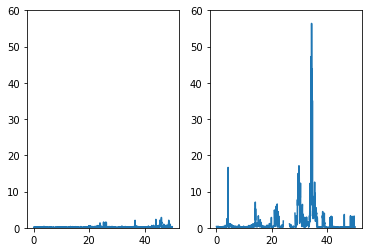

In [164]:
time_within_movie_seconds = np.linspace(0, 50, 1000)
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.plot(time_within_movie_seconds, session_compiled.loc['behavCam01DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5']['tail_base'])
ax1.set_ylim(0, 60)
ax2.plot(time_within_movie_seconds, session_compiled.loc['behavCam02DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5']['tail_base'])
ax2.set_ylim(0, 60)

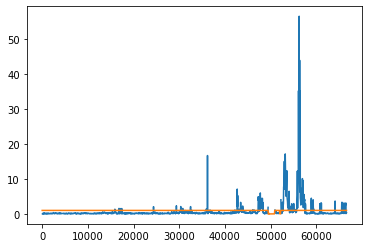

In [165]:
label = 'tail_base'
plt.plot(aligned_time_delta.index.astype('timedelta64[ms]'), aligned_time_delta[label])
plt.plot(aligned_time_delta.index.astype('timedelta64[ms]'), aligned_time_delta['tail_base_likelihood'])

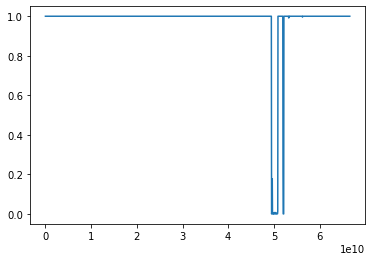

In [166]:
plt.plot(aligned_time_delta['tail_base_likelihood'])